In [2]:
# import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as mpatches
from math import floor as flr

# Task 1

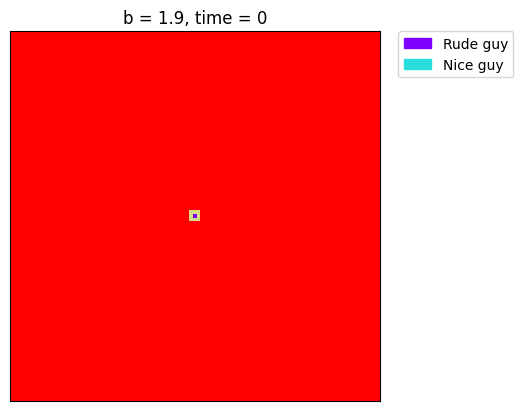

In [3]:
cc = 1
cd = 0
dc = 1.9
dd = 0

size = 101

shifts = ([1, 1], [1, 0], [1, -1], [0, 1], [0, 0], [0, -1], [-1, 1], [-1, 0], [-1, -1])

# 1 stands for "always nice", 0 for "always rude"

def fight(strat1, strat2, time):
    "Returns score of fight for strat1."

    score = 0
    for t in range(time):
        if strat1 == 1 and strat2 == 1: score += cc
        if strat1 == 1 and strat2 == 0: score += cd
        if strat1 == 0 and strat2 == 1: score += dc
        if strat1 == 0 and strat2 == 0: score += dd

    return score

def add(x, y, shift):

    new_x = x + shift[0]
    new_y = y + shift[1]

    if new_x == size: new_x = 0
    if new_y == size: new_y = 0
    if new_x == -1: new_x = size - 1
    if new_y == -1: new_y = size - 1

    return new_x, new_y

def score(grid, x, y, time):

    score = 0
    for s in shifts:
        score += fight(grid[x, y], grid[add(x, y, s)[0], add(x, y, s)[1]], time)

    return score

def create_score_grid(grid, time):

    score_grid = np.empty(grid.shape)
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            score_grid[x, y] = score(grid, x, y, time)

    return score_grid

def update_grid(grid, time):

    score_grid = create_score_grid(grid, time)
    new_grid = np.empty(grid.shape)

    # now for each cell we find neighbor with highest score

    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            
            n_scores = []
            for s in shifts:
                n_scores.append(score_grid[add(x, y, s)[0], add(x, y, s)[1]])

            # cool, now change strategy for best of neighbors

            idx = n_scores.index(max(n_scores))
            new_grid[x, y] = grid[add(x, y, shifts[idx])[0], add(x, y, shifts[idx])[1]]

    return new_grid

# initial conditions

the_grid = np.ones([size, size])
the_grid[50, 50] = 0

# let's prepare simulation

frames = []

fig = plt.figure()
ax = plt.axes()
im = ax.imshow(the_grid, cmap = "rainbow")
ax.set_title("b = 1.9, time = 0")

def init():
    im.set_data(the_grid, cmap = "rainbow")
    return [im]

def animate(i):
    im = ax.imshow(frames[i], cmap = "rainbow")
    ax.set_title("b = 1.9, time = {}".format(i))
    values = [0, 1, 2, 3]
    labels = ["D -> D", "D -> C", "C -> D", "C -> C"]
    colors = [im.cmap(im.norm(value)) for value in values]
    # create a patch (proxy artist) for every color 
    patches = [mpatches.Patch(color = colors[i], label = labels[i]) for i in range(len(values)) ]
    # put those patched as legend-handles into the legend
    ax.legend(handles = patches, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
    ax.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)

    return [im]

# time loop

total_time = 1

for t in range(total_time):
    prev_grid = the_grid
    the_grid = update_grid(the_grid, 1)
    
    # save frames

    frames.append(the_grid + 2*prev_grid) ## CC = 3, CD = 2, DC = 1, DD = 0,

# create and save animation to file

animation = FuncAnimation(fig, animate, frames = total_time)
animation.save("Prison.gif")

# Task 2

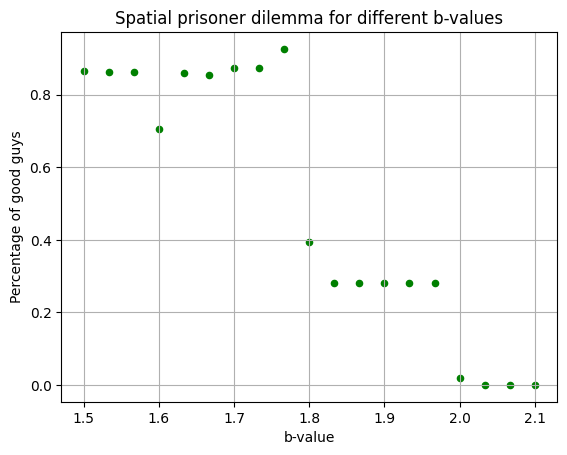

In [42]:
# INITIAL FUNCTIONS

shifts = ([1, 1], [1, 0], [1, -1], [0, 1], [0, 0], [0, -1], [-1, 1], [-1, 0], [-1, -1])

def fight(strat1, strat2, time, b):
    "Returns score of fight for strat1."

    score = 0
    for t in range(time):
        if strat1 == 1 and strat2 == 1: score += 1
        if strat1 == 1 and strat2 == 0: score += 0
        if strat1 == 0 and strat2 == 1: score += b
        if strat1 == 0 and strat2 == 0: score += 0

    return score

def add(x, y, shift):

    new_x = x + shift[0]
    new_y = y + shift[1]

    if new_x == size: new_x = 0
    if new_y == size: new_y = 0
    if new_x == -1: new_x = size - 1
    if new_y == -1: new_y = size - 1

    return new_x, new_y

def score(grid, x, y, time, b):

    score = 0
    for s in shifts:
        score += fight(grid[x, y], grid[add(x, y, s)[0], add(x, y, s)[1]], time, b)

    return score

def create_score_grid(grid, time, b):

    score_grid = np.empty(grid.shape)
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            score_grid[x, y] = score(grid, x, y, time, b)

    return score_grid

def update_grid(grid, time, b):

    score_grid = create_score_grid(grid, time, b)
    new_grid = np.empty(grid.shape)

    # now for each cell we find neighbor with highest score

    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            
            n_scores = []
            for s in shifts:
                n_scores.append(score_grid[add(x, y, s)[0], add(x, y, s)[1]])

            # cool, now change strategy for best of neighbors

            idx = n_scores.index(max(n_scores))
            new_grid[x, y] = grid[add(x, y, shifts[idx])[0], add(x, y, shifts[idx])[1]]

    return new_grid

# SIMULATION FUNCTION

def simulation(initial_grid, time, create_animation = False, animation_title = "Default title.gif", plot = False, b = 1.9, ratio = False):

    # let's prepare simulation

    frames = []

    fig = plt.figure()
    ax = plt.axes()
    im = ax.imshow(initial_grid, cmap = "rainbow")
    ax.set_title("b = 1.9, time = 0")

    def init():
        im.set_data(initial_grid, cmap = "rainbow")
        return [im]

    def animate(i):
        im = ax.imshow(frames[i], cmap = "rainbow")
        ax.set_title("Time = {}".format(i))
        values = [0, 1]
        labels = ["Rude guy", "Nice guy"]
        colors = ["red", "blue"]
        # create a patch (proxy artist) for every color 
        patches = [mpatches.Patch(color = colors[i], label = labels[i]) for i in range(len(values)) ]
        # put those patched as legend-handles into the legend
        ax.legend(handles = patches, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
        ax.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)

        return [im]

    if plot:
        plt.imshow(initial_grid, cmap = "rainbow")
        plt.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)
        plt.title("Initial grid, b={}".format(b))
        values = [0, 1]
        labels = ["Rude guy", "Nice guy"]
        colors = ["red", "blue"]
        # create a patch (proxy artist) for every color 
        patches = [mpatches.Patch(color = colors[i], label = labels[i]) for i in range(len(values)) ]
        # put those patched as legend-handles into the legend
        plt.legend(handles = patches, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
        #plt.savefig("Lab7/Grids/Initial grid, b={}.jpg".format(b))
        plt.close()

    # time loop

    for t in range(time):
        initial_grid = update_grid(initial_grid, 1, b)
        
        # save frames

        frames.append(initial_grid) ## CC = 3, CD = 2, DC = 1, DD = 0,

    # create and save animation to file

    if plot:
        # create a colormap that maps zeros to red and ones to blue
        cmap = plt.cm.RdBu_r
        cmap.set_over('red') # set color for values greater than 1
        cmap.set_under('blue') # set color for values less than 0
        bounds = [0, 1]
        norm = plt.Normalize(*bounds)

        # plot the array with updated parameters
        plt.imshow(initial_grid, cmap=cmap, norm=norm, interpolation = None)
        plt.scatter([0], [0], color = "darkred", s = 100)
        plt.scatter([0], [0], color = "darkblue", s = 100)
        plt.tick_params(labelleft=False, labelbottom=False, bottom=False, left=False)
        plt.title("Final grid, time={}, b={}".format(time, b))
        plt.legend(["Good guys", "Bad guys"], bbox_to_anchor = [1, 1])
        plt.savefig("Lab7/Grids2/Final grid, b={}.jpg".format(b))
        plt.close()

    if create_animation:

        animation = FuncAnimation(fig, animate, frames = time)
        animation.save(animation_title)

    if ratio:
        return np.sum(initial_grid) / (initial_grid.shape[0]*initial_grid.shape[1])


my_grid = np.random.choice(a = [0, 1], size = (101, 101))

# calculations

bees = np.linspace(1.5, 2.1, 19, endpoint = True)
good_guys = []

for bee in bees:
    good_guys.append(simulation(my_grid, 100, plot = True, create_animation = False, animation_title = "Prison.gif", b = bee, ratio = True))

plt.scatter(bees, good_guys, s = 20, color = "green")
plt.title("Spatial prisoner dilemma for different b-values")
plt.xlabel("b-value")
plt.ylabel("Percentage of good guys")
plt.grid()
plt.savefig("Lab7/Grids2/Results.jpg")
plt.show()